# Problem Statement
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
### Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

*   **Store** - Store number
*   **Date** - Week of Sales
*   **Weekly_Sales** - Sales for the given store in that week
*   **Holiday_Flag** - If it is a holiday week
*   **Temperature** - Temperature on the day of the sale
*   **Fuel_Price Cost** -  of the fuel in the region
*   **CPI** - Consumer Price Index
*   **Unemployment** - Unemployment Rate

#Task 1
You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

1.  If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
2. If the weekly sales show a seasonal trend, when and what could be the reason?
3. Does temperature affect the weekly sales in any manner?
4. How is the Consumer Price index affecting the weekly sales of various stores?
5. Top performing stores according to the historical data.
6. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#Loading the dataset
data = pd.read_csv("Walmart DataSet.csv", parse_dates=['Date'], index_col='Date')
sales = pd.DataFrame(data.Weekly_Sales.groupby(data.index).sum())

<ipython-input-1-4589508eb6a2>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("Walmart DataSet.csv", parse_dates=['Date'], index_col='Date')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [3]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


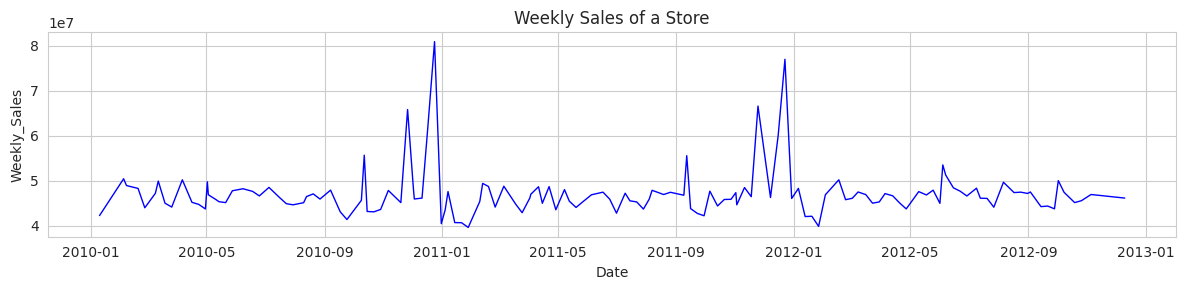

In [4]:
#Data Visualization
plt.figure(figsize=(12, 3))
sns.set_style('whitegrid')
sns.lineplot(data=sales, x=sales.index, y='Weekly_Sales', color='blue', lw=1)
plt.title('Weekly Sales of a Store')
plt.tight_layout()

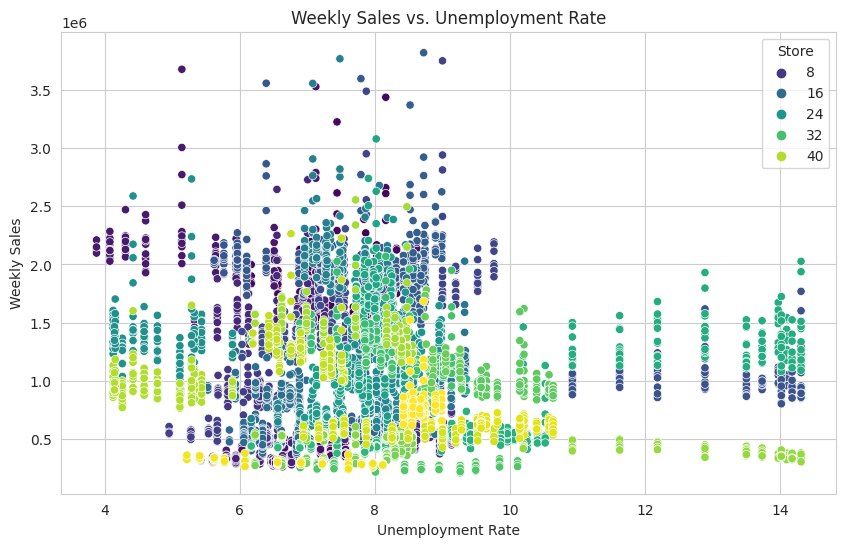

In [5]:
# a. Weekly sales vs. Unemployment rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data, hue='Store', palette='viridis')
plt.title("Weekly Sales vs. Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

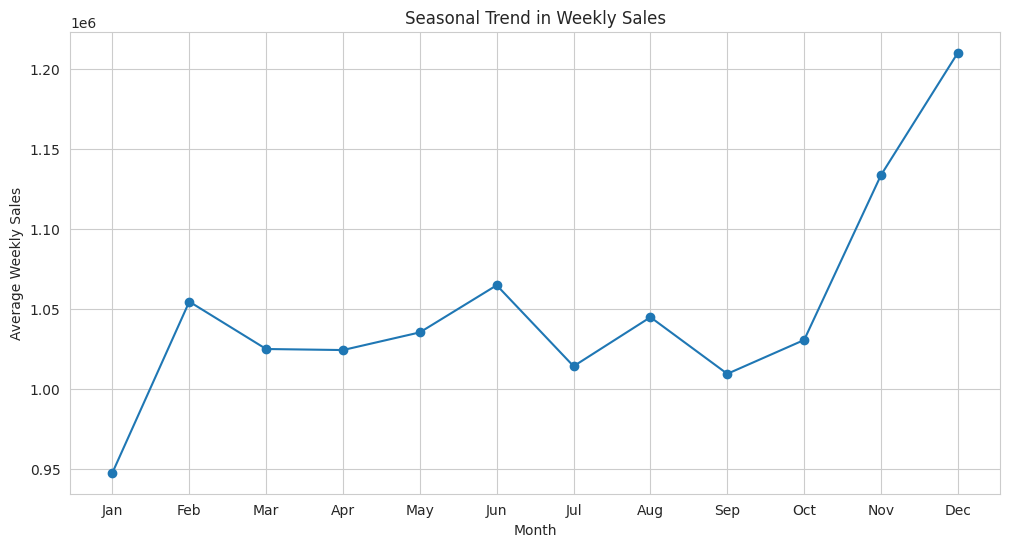

In [6]:
# b. Weekly sales seasonal trend
plt.figure(figsize=(12, 6))
data.groupby(data.index.month)['Weekly_Sales'].mean().plot(kind='line', marker='o')
plt.title("Seasonal Trend in Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

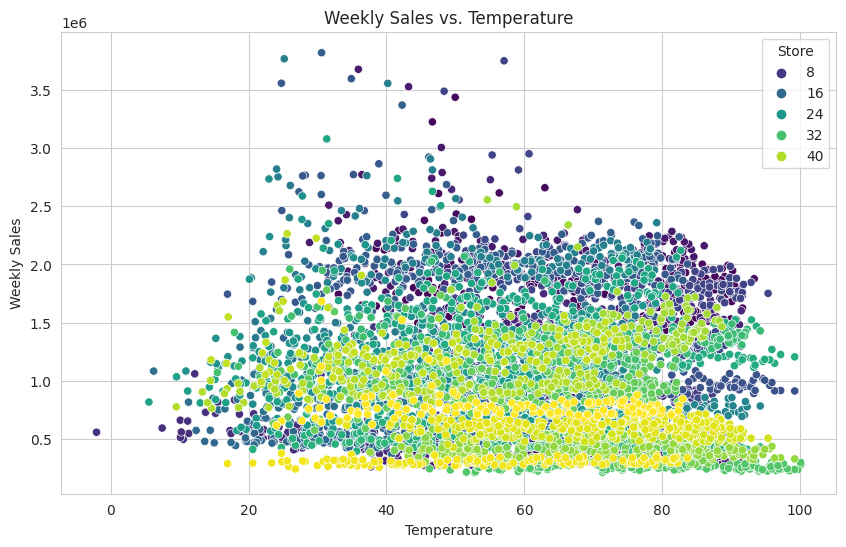

In [7]:
# c. Weekly sales vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, hue='Store', palette='viridis')
plt.title("Weekly Sales vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

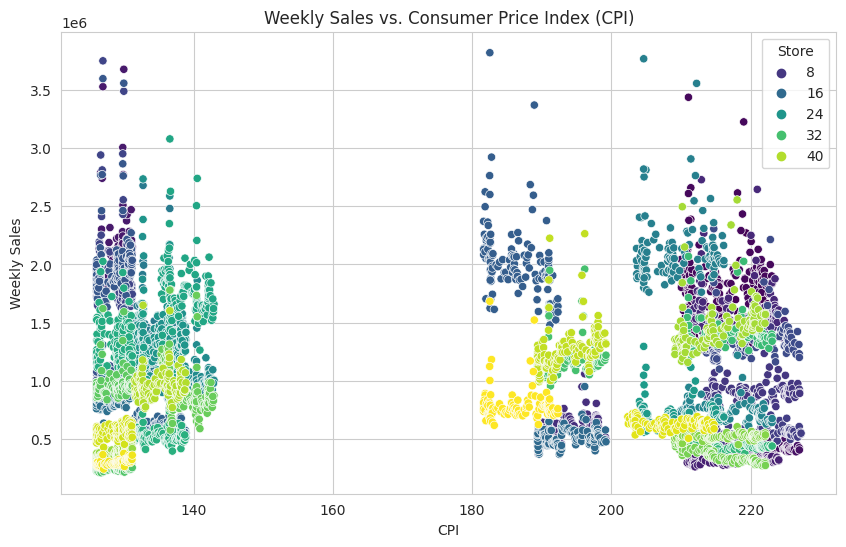

In [8]:
# d. Weekly sales vs. Consumer Price Index (CPI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, hue='Store', palette='viridis')
plt.title("Weekly Sales vs. Consumer Price Index (CPI)")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.show()

In [9]:
# e. Top performing stores
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
print("Top Performing Stores:")
print(top_stores)

Top Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [10]:
# f. Worst performing store
worst_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values().head(1)
print("Worst Performing Store:")
print(worst_store)

Worst Performing Store:
Store
33    37160221.96
Name: Weekly_Sales, dtype: float64


In [11]:
# Difference between highest and lowest performing stores
sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()
difference = sales_by_store.max() - sales_by_store.min()
print("Difference between Highest and Lowest Performing Stores:")
print(difference)

Difference between Highest and Lowest Performing Stores:
264237570.49999997


# Task 2
Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


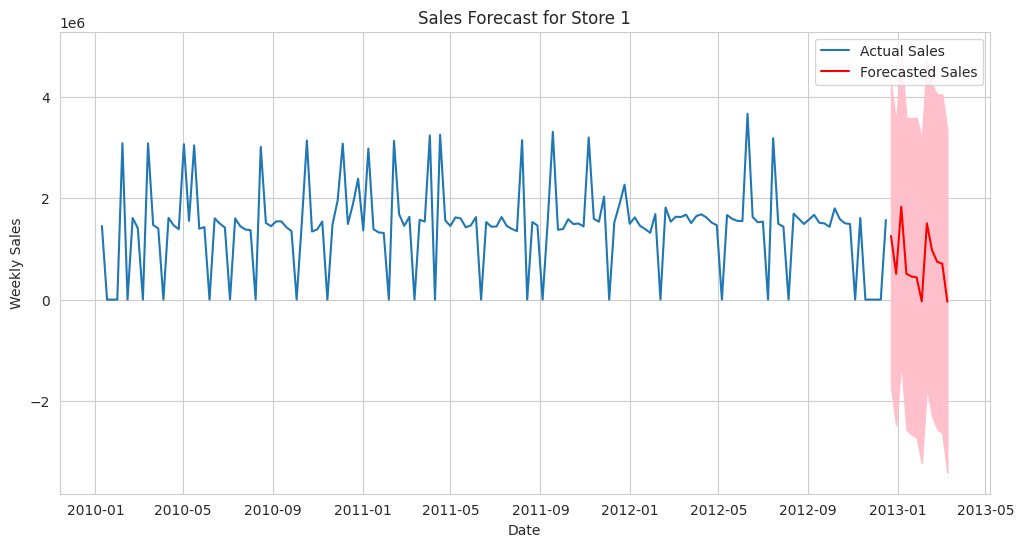

                 Date  Forecasted_Sales
2012-12-23 2012-12-23      1.255315e+06
2012-12-30 2012-12-30      5.116955e+05
2013-01-06 2013-01-06      1.831008e+06
2013-01-13 2013-01-13      5.113609e+05
2013-01-20 2013-01-20      4.568526e+05
2013-01-27 2013-01-27      4.381670e+05
2013-02-03 2013-02-03     -3.244499e+04
2013-02-10 2013-02-10      1.506588e+06
2013-02-17 2013-02-17      9.772271e+05
2013-02-24 2013-02-24      7.484235e+05
2013-03-03 2013-03-03      7.083069e+05
2013-03-10 2013-03-10     -4.102751e+04


In [12]:
import statsmodels.api as sm
def sales_forecast(store_number, data=data, forecast_period=12):

    store_data = data[data['Store'] == store_number]
    weekly_sales = store_data['Weekly_Sales'].resample('W').sum()

    #ARIMA model
    model = sm.tsa.statespace.SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    results = model.fit()

    forecast = results.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    forecast_dates = pd.date_range(start=weekly_sales.index[-1] + pd.DateOffset(1), periods=forecast_period, freq='W')

    # Plotting the actual sales and the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_sales.index, weekly_sales, label='Actual Sales')
    plt.plot(forecast_dates, forecast_values, label='Forecasted Sales', color='red')
    plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
    plt.title(f"Sales Forecast for Store {store_number}")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Forecasted values
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast_values})
    return forecast_df


forecast_df = sales_forecast(1)
print(forecast_df)